In [1]:
import pandas as pd
import os
import numpy as np

### check the work directory

In [219]:
os.getcwd()

'H:\\Jingchun\\Healthcare Data Analytics\\pandas\\Sales_Data'

## change directory

In [4]:
os.chdir(r"H:\Jingchun\Healthcare Data Analytics\pandas\Sales_Data")

## combine 12 files to 1

In [32]:
files=[file for file in os.listdir('./')]

all_months_data=pd.DataFrame()

for file in files:
    df=pd.read_csv('./'+file)
    all_months_data=pd.concat([all_months_data,df])


## save combined file to csv

In [2]:
all_months_data.to_csv('all_data.csv',index=False)



NameError: name 'all_months_data' is not defined

In [64]:
all_data=pd.read_csv('all_data.csv')
all_data.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,Unnamed: 0.1.1.1.1,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,0.0,0.0,0.0,0.0,0.0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2.0,2.0,2.0,2.0,2.0,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,3.0,3.0,3.0,3.0,3.0,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,4.0,4.0,4.0,4.0,4.0,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


## Clean up the data somehow there are extra unnamed column

In [69]:
all_data = all_data[['Order ID','Product','Quantity Ordered','Price Each','Order Date','Purchase Address']]

KeyError: "['Order ID', 'Quantity Ordered', 'Price Each', 'Order Date', 'Purchase Address'] not in index"

## Get rid of the blank space in the column names

In [65]:
all_data.columns=all_data.columns.str.replace(' ','_')

## Drop all NaN values

In [66]:
all_data=all_data.dropna(how='all')

## Get rid of the rows with headers

In [67]:
all_data=all_data.drop_duplicates()

In [220]:
all_data.head()

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address,Sales,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",23.90,8,46
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",99.99,22,30
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",600.00,14,38
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",11.99,14,38
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",11.99,9,27


## Insert month column from Order_Date

In [226]:

all_data['Month']=all_data['Order_Date'].str[5:7]

In [227]:
all_data.head()

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address,Sales,Hour,Minute,Month
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",23.90,8,46,04
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",99.99,22,30,04
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",600.00,14,38,04
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",11.99,14,38,04
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",11.99,9,27,04


## Somehow there is still one row having the header

In [224]:
# I use remove duplicates and keep False to delete rows having header but all the table content is gone
all_data=all_data[all_data['Month']!='Or']

## change the 'Month' type to int

In [228]:
all_data['Month']=all_data.Month.astype(int)

## Drop all NaN values

In [77]:
all_data=all_data.dropna(how='all')

In [80]:
nadf=all_data.isna()
nadf.head()

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address,Month
0,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False


## Check if there is any NaN values

In [229]:
all_data.isna().mean()

Order_ID            0.0
Product             0.0
Quantity_Ordered    0.0
Price_Each          0.0
Order_Date          0.0
Purchase_Address    0.0
Sales               0.0
Hour                0.0
Minute              0.0
Month               0.0
dtype: float64

# Change the columns to numeric

In [82]:
all_data['Quantity_Ordered']=pd.to_numeric(all_data['Quantity_Ordered'])
all_data['Price_Each']=pd.to_numeric(all_data['Price_Each'])

## Add 'Sales' Column by Quantity_Ordered*Price_Each

In [84]:
all_data['Sales']=all_data['Quantity_Ordered']*all_data['Price_Each']

C:\Users\jliu020\AppData\Local\Temp/ipykernel_9308/74931927.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['Sales']=all_data['Quantity_Ordered']*all_data['Price_Each']


## Group data by Month

In [85]:
all_data_gbmonth=all_data.groupby('Month')

## Check how many groups (It shoulbe be 12)

In [86]:
all_data_gbmonth.ngroups

12

In [22]:
all_data_gbmonth.head()

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99
439,176978,Apple Airpods Headphones,1,150.00,05/01/19 03:29,"589 Lake St, Portland, OR 97035",5,150.00
1044,177551,27in FHD Monitor,1,149.99,05/01/19 00:13,"615 Lincoln St, San Francisco, CA 94016",5,149.99
1282,177778,iPhone,1,700.00,05/01/19 00:48,"478 West St, Boston, MA 02215",5,700.00
1283,177778,Apple Airpods Headphones,1,150.00,05/01/19 00:48,"478 West St, Boston, MA 02215",5,150.00
2629,179076,Google Phone,1,600.00,05/01/19 00:17,"635 Chestnut St, San Francisco, CA 94016",5,600.00


## Summerize the group data by Month 

In [23]:
all_data_gbmonth.Sales.agg(['sum','max','min'])

,sum,max,min
Month,,,
1,1821413.16,1999.98,2.99
2,2200078.08,1700.00,2.99
3,2804973.35,1700.00,2.99
4,3389217.98,3400.00,2.99
5,3150616.23,3400.00,2.99
6,2576280.15,3400.00,2.99
7,2646461.32,1700.00,2.99
8,2241083.37,1700.00,2.99
9,2094465.69,1700.00,2.99


In [24]:
all_data_gbmonth.Sales.agg(['sum']).min()

sum    1821413.16
dtype: float64

In [25]:
all_data.groupby('Month').sum()['Sales']

Month
1     1821413.16
2     2200078.08
3     2804973.35
4     3389217.98
5     3150616.23
6     2576280.15
7     2646461.32
8     2241083.37
9     2094465.69
10    3734777.86
11    3197875.05
12    4608295.70
Name: Sales, dtype: float64

## Total Sales in each month

In [87]:
results=all_data.groupby('Month').sum()
results.head()

,Quantity_Ordered,Price_Each,Sales
Month,,,
1,65408,10869766.71,10932696.81
2,80676,13131363.98,13210190.18
3,102004,16745123.79,16840475.25
4,123326,20204573.86,20342569.18
5,111988,18808760.26,18913649.98


In [237]:
print(results.max())
print(results.max()['Sales'])

Quantity_Ordered      168644.00
Price_Each          27525344.82
Sales               27675512.40
dtype: float64
27675512.4


In [88]:
import matplotlib.pyplot as plt

## Make bar graph of sales in each month

Text(0, 0.5, 'Sale of USD')

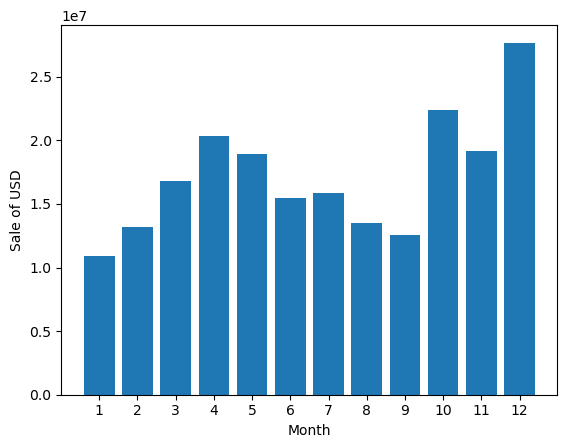

In [89]:
months=range(1,13)
plt.bar(months,results['Sales'])
plt.xticks(months)
plt.xlabel('Month')
plt.ylabel('Sale of USD')

## Add column 'City' having City

In [90]:
all_data['City']=all_data['Purchase_Address'].apply(lambda x:x.split(',')[1])
all_data.head()

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles


## Add column 'City' having City and state

In [91]:
all_data['City']=all_data['Purchase_Address'].apply(lambda x:x.split(',')[1]+' '+x.split(',')[2].split(' ')[1])
all_data.head()

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles CA


## Group City and summerize the total sales in each city

In [92]:
all_data_gbcity=all_data.groupby('City')

In [93]:
all_data.groupby('City').Sales.sum()

City
 Atlanta GA          16771691.97
 Austin TX           10915953.08
 Boston MA           21966837.70
 Dallas TX           16605250.96
 Los Angeles CA      32711158.28
 New York City NY    27983454.29
 Portland ME          2698112.73
 Portland OR         11223672.26
 San Francisco CA    49565763.10
 Seattle WA          16483823.42
Name: Sales, dtype: float64

In [94]:
results_sale_city=all_data.groupby('City').sum()
results_sale_city.head(10)

,Quantity_Ordered,Price_Each,Month,Sales
City,,,,
Atlanta GA,99594,16678149.69,628619,16771691.97
Austin TX,66902,10857708.08,418865,10915953.08
Boston MA,135134,21821447.25,846458,21966837.70
Dallas TX,100357,16513165.48,627547,16605250.96
Los Angeles CA,199692,32524347.85,1249645,32711158.28
New York City NY,167563,27809774.69,1054262,27983454.29
Portland ME,16496,2682698.61,102839,2698112.73
Portland OR,67806,11162627.54,423622,11223672.26
San Francisco CA,301364,49261310.08,1892549,49565763.10


## Make bar graph of sales in each city

Text(0, 0.5, 'Sale of USD')

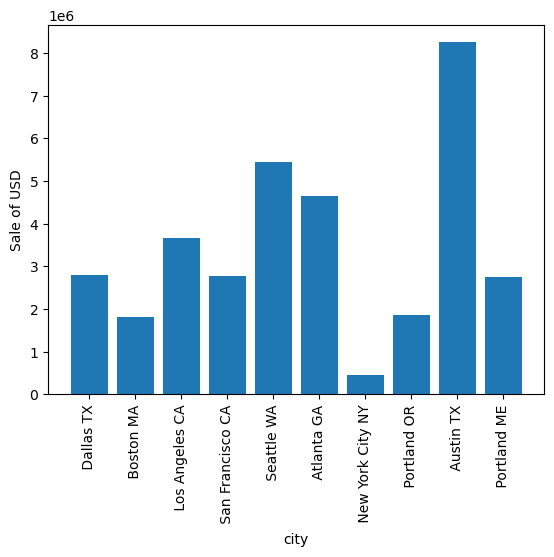

In [53]:
cities=all_data['City'].unique()
plt.bar(cities,results_sale_city['Sales'])
plt.xticks(cities,rotation = 'vertical')
plt.xlabel('city')
plt.ylabel('Sale of USD')

Text(0, 0.5, 'Sale of USD')

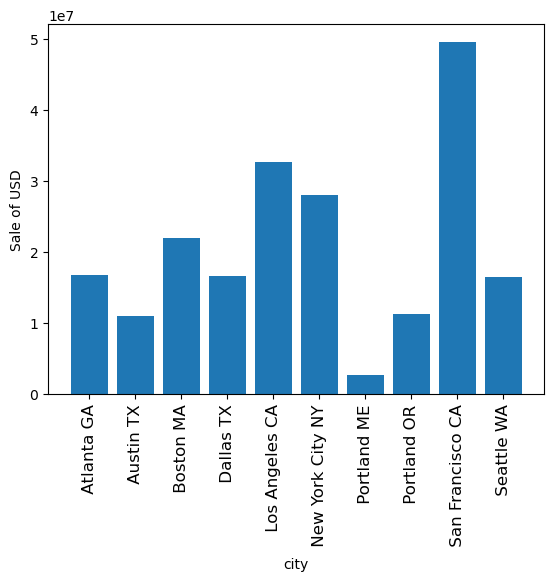

In [95]:
cities=[city for city,df in all_data.groupby('City')]
plt.bar(cities,results_sale_city['Sales'])
plt.xticks(cities,rotation='vertical', size = 12)
plt.xlabel('city')
plt.ylabel('Sale of USD')

In [63]:
all_data.head()

0   2019-04-19 08:46:00
2   2019-04-07 22:30:00
3   2019-04-12 14:38:00
4   2019-04-12 14:38:00
5   2019-04-30 09:27:00
Name: Order_Date, dtype: datetime64[ns]

## Add Hour and Minute columns to caculate the peak order time

In [97]:
all_data['Order_Date']=pd.to_datetime(all_data['Order_Date'])
all_data.head()

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address,Month,Sales,City,Order_date
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX,2019-04-19 08:46:00
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA,2019-04-07 22:30:00
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA,2019-04-12 14:38:00
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,2019-04-12 14:38:00
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,2019-04-30 09:27:00


In [102]:
all_data=all_data.drop(columns='Order_date')

In [103]:
all_data.head()

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles CA


In [107]:
all_data['Hour']=all_data['Order_Date'].dt.hour
all_data['Minute']=all_data['Order_Date'].dt.minute


In [108]:
all_data.head()

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address,Month,Sales,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX,8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA,22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA,14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,9,27


In [113]:
all_data_gbhour=all_data.groupby('Hour')
all_data_gbhour.sum()

,Quantity_Ordered,Price_Each,Month,Sales,Minute
Hour,,,,,
0,26560,4255607.59,165247,4282155.01,621293
1,15711,2750637.02,99928,2764898.30,370734
2,8387,1402989.85,51037,1409096.65,195026
3,5567,868343.57,35423,874532.39,138263
4,5620,972234.14,36875,975851.12,161210
5,8957,1377712.31,55803,1384063.97,257257
6,16859,2669850.67,105223,2688528.01,482016
7,27327,4442621.86,173037,4468337.92,764363
8,42008,7115783.95,261735,7154054.05,1188684


## Make plot graph to visualize the order peak time

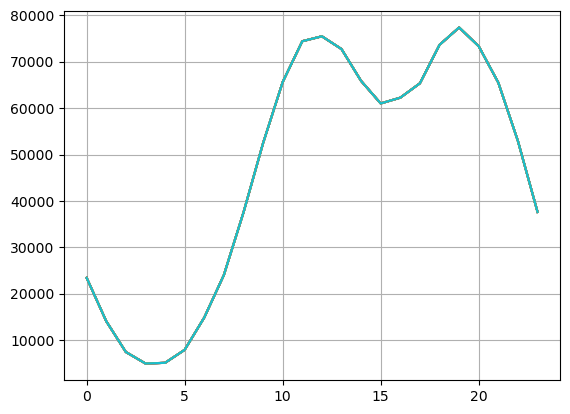

In [114]:
hours=[hour for hour,df in all_data.groupby('Hour')]
plt.plot(hours,all_data.groupby('Hour').count())
plt.grid()
plt.show()

## Create a table which can show any orders have more than one item

In [129]:
all_data_duplicated=all_data[all_data['Order_ID'].duplicated(keep=False)]
all_data_duplicated.sort_values('Order_ID',ascending=False)

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address,Month,Sales,City,Hour,Minute
55470,319631,34in Ultrawide Monitor,1,379.99,2019-12-17 22:35:00,"363 Highland St, Austin, TX 73301",12,379.99,Austin TX,22,35
55471,319631,Lightning Charging Cable,1,14.95,2019-12-17 22:35:00,"363 Highland St, Austin, TX 73301",12,14.95,Austin TX,22,35
55435,319596,Lightning Charging Cable,1,14.95,2019-12-01 08:44:00,"436 14th St, New York City, NY 10001",12,14.95,New York City NY,8,44
55434,319596,iPhone,1,700.00,2019-12-01 08:44:00,"436 14th St, New York City, NY 10001",12,700.00,New York City NY,8,44
55422,319584,Wired Headphones,1,11.99,2019-12-11 00:30:00,"537 Sunset St, Portland, OR 97035",12,11.99,Portland OR,0,30
...,...,...,...,...,...,...,...,...,...,...,...
67680,141365,Vareebadd Phone,1,400.00,2019-01-10 11:19:00,"20 Dogwood St, New York City, NY 10001",1,400.00,New York City NY,11,19
67605,141290,AA Batteries (4-pack),3,3.84,2019-01-02 08:25:00,"4 1st St, Los Angeles, CA 90001",1,11.52,Los Angeles CA,8,25
67604,141290,Apple Airpods Headphones,1,150.00,2019-01-02 08:25:00,"4 1st St, Los Angeles, CA 90001",1,150.00,Los Angeles CA,8,25
67589,141275,Wired Headphones,1,11.99,2019-01-07 16:06:00,"610 Walnut St, Austin, TX 73301",1,11.99,Austin TX,16,6


In [125]:
all_data.sort_values('Order_ID')

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address,Month,Sales,City,Hour,Minute
67547,141234,iPhone,1,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",1,700.00,Boston MA,21,25
67548,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",1,14.95,Portland OR,14,15
67549,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",1,23.98,San Francisco CA,13,33
67550,141237,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",1,149.99,Los Angeles CA,20,33
67551,141238,Wired Headphones,1,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",1,11.99,Austin TX,11,59
...,...,...,...,...,...,...,...,...,...,...,...
55506,319666,Lightning Charging Cable,1,14.95,2019-12-11 20:58:00,"14 Madison St, San Francisco, CA 94016",12,14.95,San Francisco CA,20,58
55507,319667,AA Batteries (4-pack),2,3.84,2019-12-01 12:01:00,"549 Willow St, Los Angeles, CA 90001",12,7.68,Los Angeles CA,12,1
55508,319668,Vareebadd Phone,1,400.00,2019-12-09 06:43:00,"273 Wilson St, Seattle, WA 98101",12,400.00,Seattle WA,6,43
55509,319669,Wired Headphones,1,11.99,2019-12-03 10:39:00,"778 River St, Dallas, TX 75001",12,11.99,Dallas TX,10,39


## Compare the differences between extracting the orders have two and more items and original one

In [132]:
print(all_data_duplicated.shape)
print(all_data.shape)

(14128, 11)
(185686, 11)


In [124]:
all_data=all_data.drop_duplicates()

In [141]:
all_data_duplicated.to_csv('all_data_duplicatedID.csv')

In [138]:
all_data.to_csv('all_data_backup.csv')

In [139]:
all_data.head()

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address,Month,Sales,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX,8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA,22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA,14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,9,27


## Create a table to combine the items in the same order

In [142]:
all_data_duplicated['Grouped'] = all_data_duplicated.groupby('Order_ID')['Product'].transform(lambda x:', '.join(x))
all_data_duplicated.head()

C:\Users\jliu020\AppData\Local\Temp/ipykernel_9308/1334067079.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data_duplicated['Grouped'] = all_data_duplicated.groupby('Order_ID')['Product'].transform(lambda x:', '.join(x))


,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address,Month,Sales,City,Hour,Minute,Grouped
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA,14,38,"Google Phone, Wired Headphones"
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,14,38,"Google Phone, Wired Headphones"
18,176574,Google Phone,1,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,600.00,Los Angeles CA,19,42,"Google Phone, USB-C Charging Cable"
19,176574,USB-C Charging Cable,1,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,11.95,Los Angeles CA,19,42,"Google Phone, USB-C Charging Cable"
32,176586,AAA Batteries (4-pack),2,2.99,2019-04-10 17:00:00,"365 Center St, San Francisco, CA 94016",4,5.98,San Francisco CA,17,0,"AAA Batteries (4-pack), Google Phone"


In [143]:
all_data_groupedID=all_data_duplicated[['Order_ID','Grouped']].drop_duplicates()

In [145]:
all_data_groupedID.head()

,Order_ID,Grouped
3,176560,"Google Phone, Wired Headphones"
18,176574,"Google Phone, USB-C Charging Cable"
32,176586,"AAA Batteries (4-pack), Google Phone"
119,176672,"Lightning Charging Cable, USB-C Charging Cable"
129,176681,"Apple Airpods Headphones, ThinkPad Laptop"


In [146]:
all_data_groupedID.to_csv('all_data_groupedID.csv')

## Using itertools and collections two tools to find out which combination is the most

In [148]:
from itertools import combinations
from collections import Counter

In [154]:
count = Counter()
for row in all_data_groupedID['Grouped']:
    row_list=row.split(', ')
    count.update(Counter(combinations(row_list,3)))
for key, value in count.most_common(20):
    print(key,value)

('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 86
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 62
('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones') 47
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 35
('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones') 33
('iPhone', 'Apple Airpods Headphones', 'Wired Headphones') 27
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 24
('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 16
('USB-C Charging Cable', 'Bose SoundSport Headphones', 'Wired Headphones') 5
('Vareebadd Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 5
('Lightning Charging Cable', 'Apple Airpods Headphones', 'Wired Headphones') 4
('iPhone', 'Apple Airpods Headphones', 'AAA Batteries (4-pack)') 3
('iPhone', 'Lightning Charging Cable', 'AA Batteries (4-pack)') 3
('Google Phone', 'USB-C Charging Cable', 'AAA Batteries (4-pack)') 3
('Google Phone', 'USB-C 

In [155]:
count = Counter()
for row in all_data_groupedID['Grouped']:
    row_list=row.split(', ')
    count.update(Counter(combinations(row_list,2)))
for key, value in count.most_common(20):
    print(key,value)

('iPhone', 'Lightning Charging Cable') 1002
('Google Phone', 'USB-C Charging Cable') 985
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 413
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 159
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92
('Lightning Charging Cable', 'Apple Airpods Headphones') 81
('Vareebadd Phone', 'Bose SoundSport Headphones') 80
('USB-C Charging Cable', 'Bose SoundSport Headphones') 77
('Apple Airpods Headphones', 'Wired Headphones') 69
('Lightning Charging Cable', 'USB-C Charging Cable') 58
('Lightning Charging Cable', 'AA Batteries (4-pack)') 55
('Bose SoundSport Headphones', 'Wired Headphones') 53
('AA Batteries (4-pack)', 'Lightning Charging Cable') 51
('AAA Batteries (4-pack)', 'USB-C Charging Cable') 50
('Apple Airpods Headphones', 'AAA Batteries (4-

In [157]:
all_data.sort_values('Order_ID',ascending=False)

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address,Month,Sales,City,Hour,Minute
55510,319670,Bose SoundSport Headphones,1,99.99,2019-12-21 21:45:00,"747 Chestnut St, Los Angeles, CA 90001",12,99.99,Los Angeles CA,21,45
55509,319669,Wired Headphones,1,11.99,2019-12-03 10:39:00,"778 River St, Dallas, TX 75001",12,11.99,Dallas TX,10,39
55508,319668,Vareebadd Phone,1,400.00,2019-12-09 06:43:00,"273 Wilson St, Seattle, WA 98101",12,400.00,Seattle WA,6,43
55507,319667,AA Batteries (4-pack),2,3.84,2019-12-01 12:01:00,"549 Willow St, Los Angeles, CA 90001",12,7.68,Los Angeles CA,12,1
55506,319666,Lightning Charging Cable,1,14.95,2019-12-11 20:58:00,"14 Madison St, San Francisco, CA 94016",12,14.95,San Francisco CA,20,58
...,...,...,...,...,...,...,...,...,...,...,...
67551,141238,Wired Headphones,1,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",1,11.99,Austin TX,11,59
67550,141237,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",1,149.99,Los Angeles CA,20,33
67549,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",1,23.98,San Francisco CA,13,33
67548,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",1,14.95,Portland OR,14,15


In [170]:
all_data[all_data['Order_ID']==176560]

,Unnamed: 0,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address,Month,Sales,City,Hour,Minute
2,3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA,14,38
3,4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,14,38


In [160]:
all_data=pd.read_csv('all_data.csv')

C:\Users\jliu020\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (0,2,3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [165]:
all_data.head()

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address
0,141234,iPhone,1,700.0,1/22/2019 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,1/28/2019 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,1/17/2019 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,1/5/2019 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,1/25/2019 11:59,"387 10th St, Austin, TX 73301"


In [164]:
all_data.columns=all_data.columns.str.replace(' ','_')

In [185]:
all_data=pd.read_csv('all_data_backup.csv')
all_data.head()
all_data=all_data[['Order_ID','Product','Quantity_Ordered','Price_Each','Order_Date','Purchase_Address','Sales','Hour','Minute']]

In [187]:

all_data.isnull().values.any()
all_data.isnull().mean()


Order_ID            0.0
Product             0.0
Quantity_Ordered    0.0
Price_Each          0.0
Order_Date          0.0
Purchase_Address    0.0
Sales               0.0
Hour                0.0
Minute              0.0
dtype: float64

In [186]:
all_data.describe()

,Order_ID,Quantity_Ordered,Price_Each,Sales,Hour,Minute
count,185686.000000,185686.000000,185686.000000,185686.000000,185686.000000,185686.000000
mean,230411.376227,1.124544,184.519255,185.611936,14.412934,29.480537
std,51511.717183,0.443069,332.843838,333.032118,5.423329,17.317681
min,141234.000000,1.000000,2.990000,2.990000,0.000000,0.000000
25%,185833.250000,1.000000,11.950000,11.950000,11.000000,14.000000
50%,230354.500000,1.000000,14.950000,14.950000,15.000000,29.000000
75%,275028.750000,1.000000,150.000000,150.000000,19.000000,45.000000
max,319670.000000,9.000000,1700.000000,3400.000000,23.000000,59.000000


## Create a table to find out which proudct is ordered most or top n

In [191]:
product_group=all_data.groupby('Product')
product_group.sum().sort_values('Product')

,Order_ID,Quantity_Ordered,Price_Each,Sales,Hour,Minute
Product,,,,,,
20in Monitor,950247721,4126,450739.02,453818.74,58729,122096
27in 4K Gaming Monitor,1441314778,6239,2427687.75,2433147.61,90841,184129
27in FHD Monitor,1722024291,7541,1124625.02,1131074.59,107422,219659
34in Ultrawide Monitor,1417418331,6192,2346058.26,2352898.08,88957,183318
AA Batteries (4-pack),4739758630,27615,78942.72,106041.60,298077,608560
AAA Batteries (4-pack),4758103011,30986,61629.88,92648.14,296904,611350
Apple Airpods Headphones,3573531925,15637,2328750.00,2345550.00,222938,454935
Bose SoundSport Headphones,3065241918,13430,1329667.02,1342865.70,192077,391667
Flatscreen TV,1109428389,4813,1438200.00,1443900.00,68719,142629


([<matplotlib.axis.XTick at 0x22f1b58adf0>,
 [Text(0.0, 0, '20in Monitor'),
  Text(1.0, 0, '27in 4K Gaming Monitor'),
  Text(2.0, 0, '27in FHD Monitor'),
  Text(3.0, 0, '34in Ultrawide Monitor'),
  Text(4.0, 0, 'AA Batteries (4-pack)'),
  Text(5.0, 0, 'AAA Batteries (4-pack)'),
  Text(6.0, 0, 'Apple Airpods Headphones'),
  Text(7.0, 0, 'Bose SoundSport Headphones'),
  Text(8.0, 0, 'Flatscreen TV'),
  Text(9.0, 0, 'Google Phone'),
  Text(10.0, 0, 'LG Dryer'),
  Text(11.0, 0, 'LG Washing Machine'),
  Text(12.0, 0, 'Lightning Charging Cable'),
  Text(13.0, 0, 'Macbook Pro Laptop'),
  Text(14.0, 0, 'ThinkPad Laptop'),
  Text(15.0, 0, 'USB-C Charging Cable'),
  Text(16.0, 0, 'Vareebadd Phone'),
  Text(17.0, 0, 'Wired Headphones'),
  Text(18.0, 0, 'iPhone')])

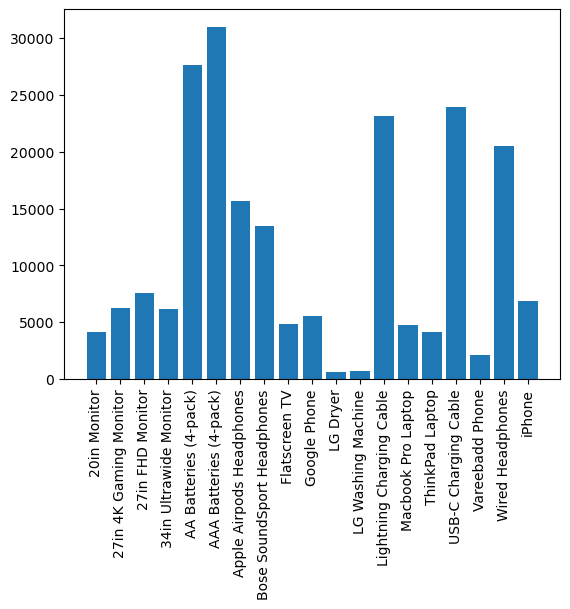

In [198]:
quantity_ordered=product_group.sum()['Quantity_Ordered']

products=[product for product,df in product_group]

plt.bar(products,quantity_ordered)
plt.xticks(products,rotation='vertical')

## Compare the amout of product ordered with the price of the prodcut

## It can explain the reason why some products were order more often

In [204]:
prices=all_data.groupby('Product').mean()['Price_Each']
prices1=all_data.groupby('Product')['Product','Price_Each']

C:\Users\jliu020\AppData\Local\Temp/ipykernel_9308/2512888848.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  prices1=all_data.groupby('Product')['Product','Price_Each']


In [211]:
prices.head()

Product
20in Monitor              109.99
27in 4K Gaming Monitor    389.99
27in FHD Monitor          149.99
34in Ultrawide Monitor    379.99
AA Batteries (4-pack)       3.84
Name: Price_Each, dtype: float64

C:\Users\jliu020\AppData\Local\Temp/ipykernel_9308/1277011754.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(products,rotation='vertical',size=8)


<function matplotlib.pyplot.show(close=None, block=None)>

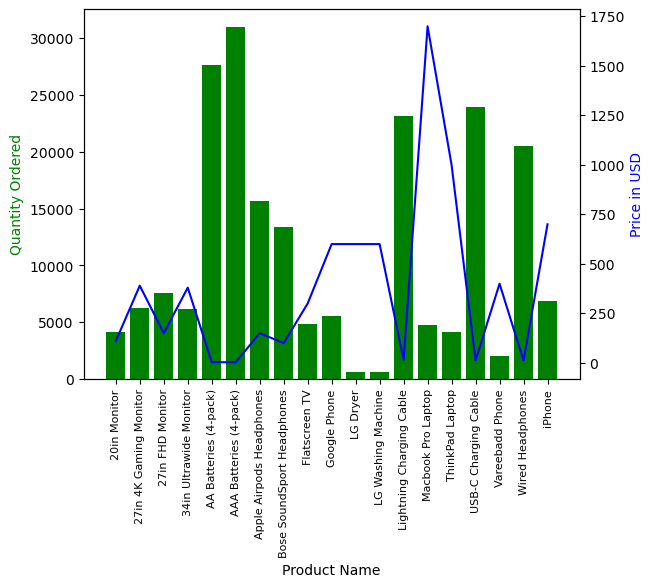

In [214]:
fig,ax1=plt.subplots()
ax2=ax1.twinx()
ax1.bar(products,quantity_ordered,color='g')
ax2.plot(products,prices,'b-')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered',color='g')
ax2.set_ylabel('Price in USD',color='b')
ax1.set_xticklabels(products,rotation='vertical',size=8)
plt.show